# <b>IFI 8420 - Assignment 2</b>
### Team 5
Mina Carbajal, Carmen Morales-Mier, Gaayathri Rayapaneni, Ignatius Jonathan Sugijono

<hr>

#### Installing all the requirement packages

In [73]:
import pandas as pd
import csv


import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import statsmodels.api as sm

import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Downloading HousePrices and Credit CSV data

In [74]:
credit_df = pd.read_csv('Credit.csv')
house_prices_df = pd.read_csv('HousePrices.csv')

print(credit_df.info())
print(house_prices_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       546 non-null    float64
 1   lotsize     546 non-

<hr>

### <b>Section 1</b> - HousePrices data set
##### <u>Section Code Split</u>
<ul>
    <li>Mina - </li>
    <li>Carmen - i - iv</li>
    <li>Gaayathri - </li>
    <li>Jonathan - </li>   
</ul>

#### Summary stat for all the variables in the HousePrices data. (<b>i</b>)

In [75]:
numeric_cols = house_prices_df.select_dtypes(include=[np.number])

summary_stats = numeric_cols.describe().T
summary_stats["median"] = numeric_cols.median()

print(summary_stats[["mean", "median", "max", "min", "std"]])

                   mean   median       max      min           std
price      68121.597070  62000.0  190000.0  25000.0  26702.670926
lotsize     5150.265568   4600.0   16200.0   1650.0   2168.158725
bedrooms       2.965201      3.0       6.0      1.0      0.737388
bathrooms      1.285714      1.0       4.0      1.0      0.502158
stories        1.807692      2.0       4.0      1.0      0.868203
garage         0.692308      0.0       3.0      0.0      0.861307


#### Percentage of houses in the data with Driveway, Gas-Heat, and Air-conditioning present. (<b>ii</b>)

In [76]:
#Checking unique values in categorical columns BEFORE conversion
print("Unique values in categorical columns:")
print(house_prices_df[['driveway', 'gasheat', 'aircon']].apply(pd.unique))

Unique values in categorical columns:
  driveway gasheat aircon
0      yes      no     no
1       no     yes    yes


In [77]:
#Converting 'yes' to 1 and 'no' to 0
house_prices_df[['driveway', 'gasheat', 'aircon']] = house_prices_df[['driveway', 'gasheat', 'aircon']].replace({'yes': 1, 'no': 0})

#Calculating the percentage of houses with each feature
percentages = house_prices_df[['driveway', 'gasheat', 'aircon']].mean() * 100

print(f"Percentage of houses with Driveway: {percentages['driveway']:.2f}%")
print(f"Percentage of houses with Gas-Heat: {percentages['gasheat']:.2f}%")
print(f"Percentage of houses with Air-conditioning: {percentages['aircon']:.2f}%")

Percentage of houses with Driveway: 85.90%
Percentage of houses with Gas-Heat: 4.58%
Percentage of houses with Air-conditioning: 31.68%


C:\Users\Mina\AppData\Local\Temp\ipykernel_13688\708984163.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_prices_df[['driveway', 'gasheat', 'aircon']] = house_prices_df[['driveway', 'gasheat', 'aircon']].replace({'yes': 1, 'no': 0})


#### Constructing a linear regression model to test whether number of bedrooms influence house prices + summary of the model. (<b>iii</b>)

In [78]:
X = house_prices_df[['bedrooms']]
y = house_prices_df['price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     84.38
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           8.53e-19
Time:                        20:58:15   Log-Likelihood:                -6300.0
No. Observations:                 546   AIC:                         1.260e+04
Df Residuals:                     544   BIC:                         1.261e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.877e+04   4413.753      6.519      0.0

#### Constructing a multiple linear regression model and observing the effect on the house prices + summary of the model. (<b>iv</b>)

In [79]:
# Getting dummy variables
house_prices_df = house_prices_df.replace({'yes': 1, 'no': 0})

# Creating the model
X = house_prices_df[['lotsize', 'bedrooms', 'bathrooms', 'stories', 'driveway', 'recreation', 'fullbase', 'gasheat', 'aircon', 'garage', 'prefer']].values
y = house_prices_df['price'].values

X1 = sm.add_constant(X)

model = sm.OLS(y, X1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          6.18e-122
Time:                        20:58:21   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4038.3504   3409.471     -1.184      0.2

C:\Users\Mina\AppData\Local\Temp\ipykernel_13688\2927854671.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_prices_df = house_prices_df.replace({'yes': 1, 'no': 0})


<hr>

### <b>Section 2</b> - Credit data set part 1
##### <u>Section Code Split</u>
<ul>
    <li>Mina - </li>
    <li>Carmen - A-i until A-ii</li>
    <li>Gaayathri - A-iii until B</li>
    <li>Jonathan - </li>
</ul>

#### Observing the dimension of the Credit data. (<b>A-i</b>)

In [298]:
print(f"Shape of Credit Data: {credit_df.shape}")

Shape of Credit Data: (400, 12)


#### Summary stat for the variables in Credit data. (<b>A-ii</b>)

In [301]:
credit_summary = credit_df.describe()

print(credit_summary)

       Unnamed: 0      Income         Limit      Rating       Cards  \
count  400.000000  400.000000    400.000000  400.000000  400.000000   
mean   200.500000   45.218885   4735.600000  354.940000    2.957500   
std    115.614301   35.244273   2308.198848  154.724143    1.371275   
min      1.000000   10.354000    855.000000   93.000000    1.000000   
25%    100.750000   21.007250   3088.000000  247.250000    2.000000   
50%    200.500000   33.115500   4622.500000  344.000000    3.000000   
75%    300.250000   57.470750   5872.750000  437.250000    4.000000   
max    400.000000  186.634000  13913.000000  982.000000    9.000000   

              Age   Education      Balance  
count  400.000000  400.000000   400.000000  
mean    55.667500   13.450000   520.015000  
std     17.249807    3.125207   459.758877  
min     23.000000    5.000000     0.000000  
25%     41.750000   11.000000    68.750000  
50%     56.000000   14.000000   459.500000  
75%     70.000000   16.000000   863.000000  


#### Calculating the percentages of:
<ul>
    <li>Student</li>
    <li>Female</li>
    <li>Student who are Female</li>
</ul>
<h4>in the Credit data. (<b>A-iii</b>)</h4>

#### Constructing a linear regression model to test:
<ul>
    <li>How Credit Rating and Student effect Credit Card Balance</li>
    <li>Whether the effect of Credit Rating on Credit Card Balance is different for students vs. non-students</li>
</ul>
<h4>+ summary of the model. (<b>B</b>)</h4>

<hr>

### <b>Section 3</b> - Credit data set part 2
##### <u>Section Code Split</u>
<ul>
    <li>Mina - </li>
    <li>Carmen - </li>
    <li>Gaayathri - i until iv</li>
    <li>Jonathan - </li>   
</ul>

#### Testing whether Age influence Credit Card Balance on the basis of simple linear regression + summary of the model using the summary() function. (<b>i</b>)

#### Using Age and Credit Rating as predictors of Credit Card Balance (response variable) in a multiple linear regression setting + summary of the model. (<b>ii</b>)

#### Comparing effect of Age from part (i) and (ii) _in Pythoncode_. (<b>iii</b>)

#### Observing the distribution of Age and constructing 3 dummy variables based on it:
<ol>
    <li>Age 40 and below (Age≤40)</li>
    <li>Age Between 41 to 56 (41≤Age≤56)</li>
    <li>Age group over 56 (Age>56)</li>
</ol>
<h4>in the Credit data. (<b>iv</b>)</h4>

<hr>

### <b>Section 4</b> - S&P 500 price data and NVIDIA stock
##### <u>Section Code Split</u>
<ul>
    <li>Mina - i - vi</li>
    <li>Carmen - </li>
    <li>Gaayathri - </li>
    <li>Jonathan - vii - xi</li>   
</ul>

#### Downloading the monthly price data of S&P500 and NVIDIA. (<b>i</b>)

In [320]:
import yfinance as yf

In [322]:
tickers = ['SPY', 'NVDA']
stock_data = {}

for ticker in tickers:
    data = yf.download(ticker, start='2005-01-01', end='2019-12-31', interval='1mo')
    stock_data[ticker] = data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


#### Computing the monthly returns for the S&P 500 and NVIDIA + constructing one data frame to store the return series. (<b>ii</b>)

In [325]:
# Adjusted Close Prices
adjusted_close = pd.concat((stock_data[ticker]['Close'] for ticker in tickers), axis=1)
adjusted_close.columns = tickers

#Monthly Log Returns
def monthly_log_returns(df, stocks):
    mlog_returns = pd.DataFrame(index = df.index)
    for stock in stocks:
        if stock in df.columns:
            mlog_returns[stock] = np.log(df[stock]/df[stock].shift(1))
        else:
            print("error")
    return mlog_returns
    
mlog_returns = monthly_log_returns(adjusted_close, tickers)

## Dropping the null observation
mlog_returns2 = mlog_returns.dropna()
mlog_returns2

,SPY,NVDA
Date,,
2005-02-01,0.020688,0.234940
2005-03-01,-0.022382,-0.198947
2005-04-01,-0.014993,-0.080147
2005-05-01,0.031717,0.211676
2005-06-01,-0.002514,-0.014118
...,...,...
2019-08-01,-0.016886,-0.007197
2019-09-01,0.014664,0.039404
2019-10-01,0.026471,0.143947


#### Constructing summary statistics, histogram, correlation matrix of the return series. (<b>iii</b>)

In [328]:
# Summary Statistics
mlog_returns2.describe()

,SPY,NVDA
count,179.000000,179.000000
mean,0.007251,0.019608
std,0.040697,0.132510
min,-0.174776,-0.492476
25%,-0.013482,-0.043333
50%,0.013551,0.028694
75%,0.031070,0.101028
max,0.108752,0.440347


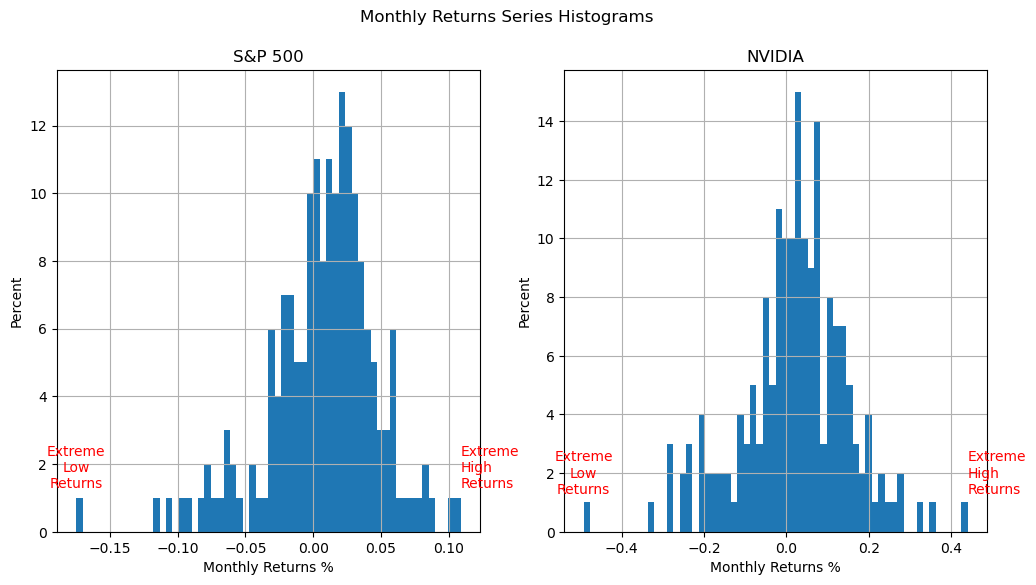

In [330]:
# Histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
mlog_returns2['SPY'].hist(bins=60, ax=axs[0])
mlog_returns2['NVDA'].hist(bins=60, ax=axs[1])

plt.suptitle('Monthly Returns Series Histograms')
axs[0].set_title('S&P 500')
axs[1].set_title('NVIDIA')

for ax in axs:
    ax.set_xlabel('Monthly Returns %')
    ax.set_ylabel('Percent')

axs[0].text(mlog_returns2['SPY'].min(), 1.3, 'Extreme\nLow\nReturns', ha='center', color='red')
axs[0].text(mlog_returns2['SPY'].max(), 1.3, 'Extreme\nHigh\nReturns', color='red')
axs[1].text(mlog_returns2['NVDA'].min(), 1.3, 'Extreme\nLow\nReturns', ha='center', color='red')
axs[1].text(mlog_returns2['NVDA'].max(), 1.3, 'Extreme\nHigh\nReturns', color='red')
    
plt.show()

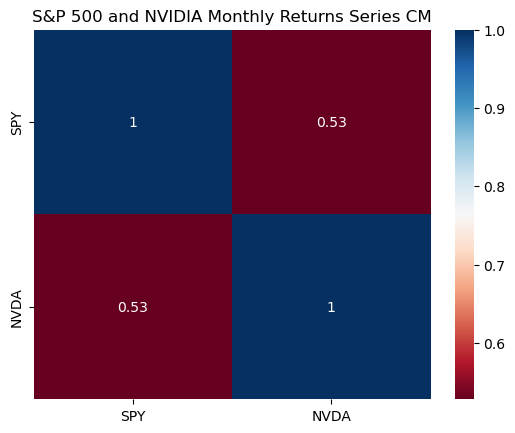

In [332]:
# Correlation matrix
correlation_matrix = mlog_returns2.corr()

seabornInstance.heatmap(correlation_matrix, annot=True, cmap='RdBu')
plt.title('S&P 500 and NVIDIA Monthly Returns Series CM')
plt.show()

#### Downloading 3 month TBill rate from Fred. (<b>iv</b>)

In [335]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [336]:
from fredapi import Fred
fred = Fred(api_key='cd33bef0eccbe064b1f3daf1afeba501')

tbill = fred.get_series('TB3MS', '2005-01-01', '2019-12-31')
tbill = pd.DataFrame(tbill, columns=['TB3MS'])

# Converting the rates from percent to decimal, and from annual to monthly
tbill['Monthly_Rate'] = (tbill['TB3MS'] / 100) / 12
tbill

,TB3MS,Monthly_Rate
2005-01-01,2.33,0.001942
2005-02-01,2.54,0.002117
2005-03-01,2.74,0.002283
2005-04-01,2.78,0.002317
2005-05-01,2.84,0.002367
...,...,...
2019-08-01,1.95,0.001625
2019-09-01,1.89,0.001575
2019-10-01,1.65,0.001375
2019-11-01,1.54,0.001283


### Constructing a matrix of return series combining NVIDIA, S&P500, and TBill for the sample period + constructing a return series with columns of excess returns. (<b>v</b>)

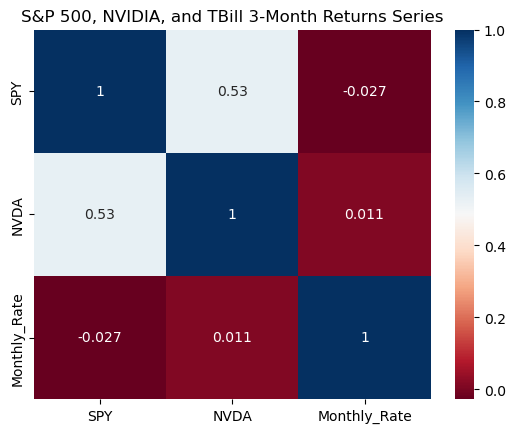


Return Series with Excess Return Columns


,SPY,NVDA,Monthly_Rate,Excess_SPY,Excess_NVDA
2005-02-01,0.020688,0.234940,0.002117,0.018572,0.232823
2005-03-01,-0.022382,-0.198947,0.002283,-0.024666,-0.201230
2005-04-01,-0.014993,-0.080147,0.002317,-0.017310,-0.082464
2005-05-01,0.031717,0.211676,0.002367,0.029350,0.209310
2005-06-01,-0.002514,-0.014118,0.002475,-0.004989,-0.016593
...,...,...,...,...,...
2019-08-01,-0.016886,-0.007197,0.001625,-0.018511,-0.008822
2019-09-01,0.014664,0.039404,0.001575,0.013089,0.037829
2019-10-01,0.026471,0.143947,0.001375,0.025096,0.142572
2019-11-01,0.035558,0.075294,0.001283,0.034275,0.074011


In [338]:
# Combined Return Series
combined_returns = pd.concat([mlog_returns2, tbill['Monthly_Rate']], axis=1).dropna()

# Correlation matrix of Combined Return Series
com_correlation_matrix = combined_returns.corr()

seabornInstance.heatmap(com_correlation_matrix, annot=True, cmap='RdBu')
plt.title('S&P 500, NVIDIA, and TBill 3-Month Returns Series')
plt.show()

# Combined Return Series with Excess Return Columns
combined_returns['Excess_SPY'] = combined_returns['SPY'] - combined_returns['Monthly_Rate']
combined_returns['Excess_NVDA'] = combined_returns['NVDA'] - combined_returns['Monthly_Rate']

print('\nReturn Series with Excess Return Columns')
combined_returns

### Constructing a linear regression model with the excess returns. (<b>vi</b>)

In [340]:
# Predictor variable
X = combined_returns['Excess_SPY']
# Response variable
y = combined_returns['Excess_NVDA']
# Adding intercept (beta_0)
X1 = sm.add_constant(X)

model = sm.OLS(y, X1).fit()
predictions = model.predict(X1)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Excess_NVDA   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     68.30
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           3.20e-14
Time:                        18:22:04   Log-Likelihood:                 137.51
No. Observations:                 179   AIC:                            -271.0
Df Residuals:                     177   BIC:                            -264.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0079      0.009      0.930      0.354      -0.009       0.025
Excess_SPY     1.7155      0.208      8.265      0.000       1.306       2.125
==============================================================================
Omnibus:                       15.156   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               43.736
Skew:                          -0.172   Prob(JB):                     3.18e-10
Kurtosis:                       5.397   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Beta for the stock based on the model constructed, testing the null hypothesis, and drawing a conclusion based on p-value. (<b>vii</b>)

In [342]:
print(f"Beta for the stock based on the model constructed: {model.params.iloc[1]:2f}")

p_value = model.pvalues['Excess_SPY']
print(f"P-value for the coefficient of Excess_SPY: {p_value:2f}\n")

print("Null hypothesis -> Beta for Excess_SPY = 0")
print("Based on the p-value, which was highly significant, we reject the null hypothesis. This means there is strong evidence to suggest that the excess return of SPY (Excess_SPY) is a significant predictor of the excess return of NVDA (Excess_NVDA).")

Beta for the stock based on the model constructed: 1.715537
P-value for the coefficient of Excess_SPY: 0.000000

Null hypothesis -> Beta for Excess_SPY = 0
Based on the p-value, which was highly significant, we reject the null hypothesis. This means there is strong evidence to suggest that the excess return of SPY (Excess_SPY) is a significant predictor of the excess return of NVDA (Excess_NVDA).


### Beta of the stock from the available stock report + discussing why these two measures are same or different. (<b>viii</b>)

<h5>Model Constructed Beta: 1.715538</h5>
<h5>Reported Beta: 1.66 (https://finance.yahoo.com/quote/NVDA)</h5>

<p>The beta values from the model and from Yahoo Finance is close but not identical. There are multiple reasons why theyr are different.</p>
<p>1. The time period or timeframe that we used in our model is from January 2005 until December 2019 which might be different than the financial website (Yahoo Finance) since they update their data realtime. This differences can lead to variations in beta due to market and stock volatility.</p>
<p>2. The market index (SPY) that we used might be difference than the one that Yahoo Finance use (which can be a combined from multiple indexes)</p>
<p>3. The methods that we used can be different with the methods that Yahoo Finance use for their daily stock data</p>
<p>While the beta values are not exactly the same, they are close enough to conclude that NVIDIA (NVDA) is more volatile than the market. Both measures indicate that NVDA is a higher-risk, higher-reward stock.</p>

### Model accuracy: standard error and R-square. (<b>ix</b>)

In [346]:
r_squared = model.rsquared
print(f"Model R-squared: {r_squared:5f}")
print("The R-squared value indicates that approximately 27.8% of the variability in the response variable (Excess_NVDA) is explained by the predictor variable (Excess_SPY), which means that while the model successfully captures some of the variability, most of the portion remains unexplained by the predictor.\n")

std_error = model.bse['Excess_SPY']
print(f"Model Standard Error: {std_error:5f}")
print("The standard error value measures the average distance that the observed values fall from the regression line. It shows the accuracy of the model's predictions. A lower standard error means that the model's predictions are closer to the actual values, which indicate a better fit.")

Model R-squared: 0.278448
The R-squared value indicates that approximately 27.8% of the variability in the response variable (Excess_NVDA) is explained by the predictor variable (Excess_SPY), which means that while the model successfully captures some of the variability, most of the portion remains unexplained by the predictor.

Model Standard Error: 0.207575
The standard error value measures the average distance that the observed values fall from the regression line. It shows the accuracy of the model's predictions. A lower standard error means that the model's predictions are closer to the actual values, which indicate a better fit.


### Scatter plot + fitted line for the linear regression model. (<b>x</b>)

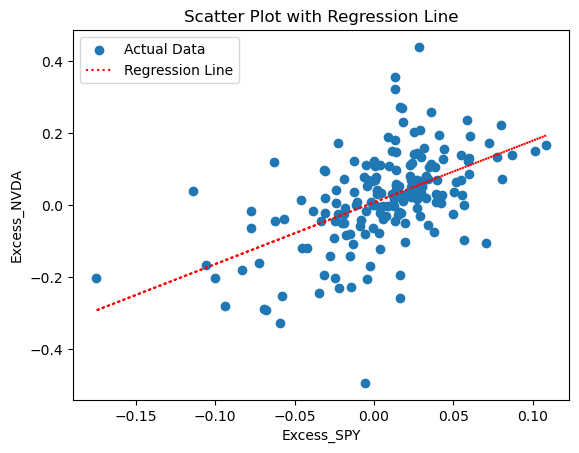

In [349]:
plt.scatter(X, y, label='Actual Data')
plt.plot(X, predictions, color='red', linestyle='dotted', label='Regression Line')

plt.xlabel('Excess_SPY')
plt.ylabel('Excess_NVDA')
plt.title('Scatter Plot with Regression Line')
plt.legend()

plt.show()

### Interpretation of the analysis: considering return of the stock and S&P 500 and the model constructed. (<b>xi</b>)

The analysis of the regression model constructed to examine the relationship between NVIDIA's (NVDA) excess return and the excess return of the S&P 500 (SPY) has several points:

<h4>Beta Values:</h4>
The beta values from the model and Yahoo Finance are different but close enough. The model beta = 1.7155 and the beta from the stock report (Yahoo Finance) is 1.66. There are several reasons that might cause the differences:
1. Time Period: The timeframe used in our model is from January 2005 until December 2019 and Yahoo Finance updates their data in real-time. These differences can lead to variations in beta due to market and stock volatility.
2. Market Index: Our model uses the SPY index, which might differ from the index or indices used by Yahoo Finance.
3. Methodology: The methods used in our model can differ from those employed by Yahoo Finance for their daily stock data.

While the beta values are not exactly the same, they are close enough to conclude that NVIDIA (NVDA) is more volatile than the market which means that NVIDIA is a high-risk, high-return stock.

<h4>Model Interpretation:</h4>
The R-squared value is 0.278, which indicate that around 27.8% of the data in NVIDIA's excess return (Excess_NVDA) is explained by the model using the excess return of SPY (Excess_SPY) as the predictor. This R-squared value suggests that the market index (SPY) has a decent explanatory power over NVIDIA's returns. 
The model Standard Error: 0.207575. The standard error value measures the average distance that the observed values fall from the regression line. It shows the accuracy of the model's predictions. A lower standard error means that the model's predictions are closer to the actual values, which indicate a better fit.

<h4>Conclusion:</h4>
The analysis indicates that there is a positive relationship between the excess return of NVIDIA and the excess return of the S&P 500. While the R-squared value is not very high, the significant coefficient of Excess_SPY highlights that the market index is a crucial factor in explaining NVIDIA's returns. The model suggests that NVIDIA's stock is more volatile than the market, making it a higher-risk, higher-reward investment. However, the residuals' analysis points to some deviations from normality, which might be considered for further model refinement.